# Team Project - Anomaly Detection

In [1]:
# Libraries
import pandas as pd
import numpy as np

# Wrangling
import acquire as a
import prepare as p

# Exploration/Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
import explore as e
from IPython.core import display as ICD

from env import get_db_url

# Custom notebook settings for max rows and columns
# pd.set_option('display.max_rows', 2000)
# pd.set_option('display.max_columns', None)

## Acquire
- Will acquire a dataset to use in answering our questions by doing the following.
    - Acquire a dataset from a SQL server database 
    - Save it locally as a .csv file
    - Convert the .csv file as a dataframe using Pandas

In [2]:
# returns a dataframe after acquiring curriculum log data from SQL database
df = a.get_log_data()

- Total rows = 900223
- Deleted_at = 100% nulls
- Most columns have 52,893 nulls

## Prepare
 - Will prepare the dataframe to best answer the question in Explore section by doing the following
     - Dropping all rows with nulls
     - Dropping unnecessary columns
     - Converting columns to useful datatypes
     - Renaming columns for clarity

In [3]:
q2_df = p.q2_df_prep(df)

## Exploration
- Question 2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [4]:
# Returns a dataframe with entries that fall within the start and end dates for their respective cohort
q2_df = q2_df[(q2_df['date_time'] >= q2_df['start_date']) & (q2_df['date_time'] <= q2_df['end_date'])]

Dataframe abbreviations:
- q2_fsp = full_stack_php
- q2_fsj = full_stack_java
- q2_ds = data_science
- q2_fep = front_end_programming

In [5]:
# full stack php dataframe
q2_fsp = q2_df[q2_df.programs == 'full_stack_php']

# full stack java dataframe
q2_fsj  = q2_df[q2_df.programs == 'full_stack_java']

# data science dataframe
q2_ds = q2_df[q2_df.programs == 'data_science']

# front end programming dataframe
q2_fep = q2_df[q2_df.programs == 'front_end_programming']

Quick takeaways
- After removing rows whose "date_time" entry didn't fall within the associated "start_date" & "end_date" for the class, it resulted in the the Full Stack PHP and Front End Programming to return empty dataframes after the original dataframe was divided up by program.
- This indicates that all entries for those programs were either before or after their associated class dates
- The Full Stack Java and Data Science programs are the two remaining dataframes that will be use

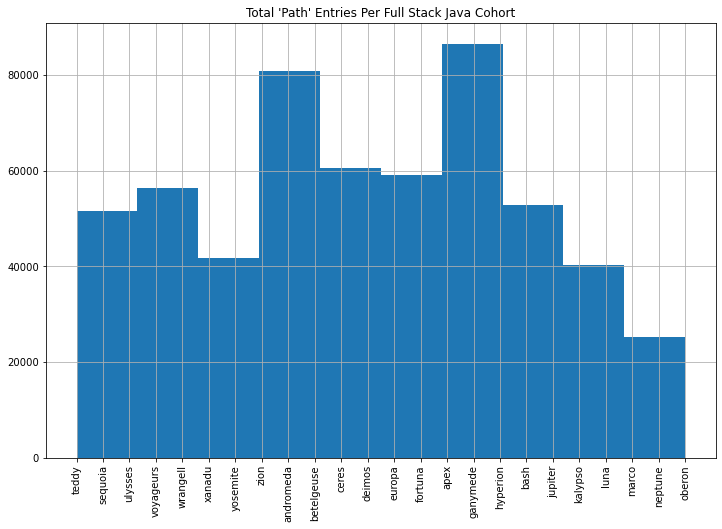

In [6]:
# Plots histogram of number of entries for all Data cohorts
e.q2_fsj_hist(q2_fsj)

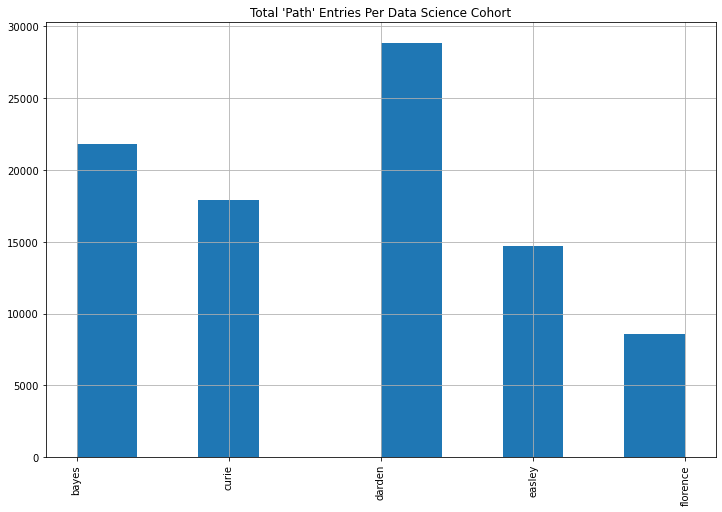

In [7]:
# Plots histogram of number of entries for all Data cohorts
e.q2_ds_hist(q2_ds)

In [8]:
# filters the rows that contain 'fundamentals'
q2_ds_fundamentals = q2_ds[q2_ds['path'].str.contains('fundamentals')]

# filters the rows that contain 'classification'
q2_ds_classification = q2_ds[q2_ds['path'].str.contains('classification')]

# filters the rows that contain 'sql'
q2_ds_sql = q2_ds[q2_ds['path'].str.contains('sql')]

# filters the rows that contain 'regression'
q2_ds_regression = q2_ds[q2_ds['path'].str.contains('regression')]

# filters the rows that contain 'anomaly-detection'
q2_ds_anomaly_detection = q2_ds[q2_ds['path'].str.contains('anomaly-detection')]

# filters the rows that contain 'python'
q2_ds_python = q2_ds[q2_ds['path'].str.contains('python')]

# filters the rows that contain 'stats'
q2_ds_stats = q2_ds[q2_ds['path'].str.contains('stats')]

# filters the rows that contain 'clustering'
q2_ds_clustering = q2_ds[q2_ds['path'].str.contains('clustering')]

# filters the rows that contain 'storytelling'
q2_ds_storytelling = q2_ds[q2_ds['path'].str.contains('storytelling')]

# filters the rows that contain 'timeseries'
q2_ds_timeseries = q2_ds[q2_ds['path'].str.contains('timeseries')]

# filters the rows that contain 'nlp'
q2_ds_nlp = q2_ds[q2_ds['path'].str.contains('nlp')]

# filters the rows that contain 'distributed-ml'
q2_ds_distributed_ml = q2_ds[q2_ds['path'].str.contains('distributed-ml')]

# filters the rows that contain 'advanced-topics'
q2_ds_advanced_topics = q2_ds[q2_ds['path'].str.contains('advanced-topics')]

In [9]:
# df of values in 'path' column that contain 'javascript-i'
q2_fsj_javascript_i = q2_fsj[q2_fsj['path'].str.contains('javascript-i')]

In [10]:
# df of values in 'path' column that contain 'java-iii'
q2_fsj_java_iii = q2_fsj[q2_fsj['path'].str.contains('java-iii')]

# df of values in 'path' column that contain 'html-css'
q2_fsj_html_css = q2_fsj[q2_fsj['path'].str.contains('html-css')]

# df of values in 'path' column that contain 'java-ii'
q2_fsj_java_ii = q2_fsj[q2_fsj['path'].str.contains('java-ii')]

# df of values in 'path' column that contain 'jquery'
q2_fsj_jquery = q2_fsj[q2_fsj['path'].str.contains('jquery')]

# df of values in 'path' column that contain 'mysql'
q2_fsj_mysql = q2_fsj[q2_fsj['path'].str.contains('mysql')]

# df of values in 'path' column that contain 'spring'
q2_fsj_spring = q2_fsj[q2_fsj['path'].str.contains('spring')]

# df of values in 'path' column that contain 'slides'
q2_fsj_slides = q2_fsj[q2_fsj['path'].str.contains('slides')]

# df of values in 'path' column that contain 'web-design'
q2_fsj_web_design = q2_fsj[q2_fsj['path'].str.contains('web-design')]

In [11]:
# list of names of ds lesson dfs
q2_ds_lesson_dfs = [q2_ds_fundamentals, q2_ds_classification, q2_ds_sql,
                    q2_ds_regression, q2_ds_anomaly_detection, q2_ds_python,
                    q2_ds_stats, q2_ds_clustering, q2_ds_storytelling, 
                    q2_ds_timeseries, q2_ds_nlp, q2_ds_distributed_ml, 
                    q2_ds_advanced_topics]

Groupby for Data Science

In [12]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_fundamentals_groupby = q2_ds_fundamentals.groupby('cohort')['path'].count()

q2_ds_classification_groupby = q2_ds_classification.groupby('cohort')['path'].count()

q2_ds_sql_groupby = q2_ds_sql.groupby('cohort')['path'].count()

q2_ds_regression_groupby = q2_ds_regression.groupby('cohort')['path'].count()

q2_ds_anomaly_detection_groupby = q2_ds_anomaly_detection.groupby('cohort')['path'].count()

q2_ds_python_groupby = q2_ds_python.groupby('cohort')['path'].count()

q2_ds_stats_groupby = q2_ds_stats.groupby('cohort')['path'].count()

q2_ds_clustering_groupby = q2_ds_clustering.groupby('cohort')['path'].count()

q2_ds_storytelling_groupby = q2_ds_storytelling.groupby('cohort')['path'].count()

q2_ds_timeseries_groupby = q2_ds_timeseries.groupby('cohort')['path'].count()

q2_ds_nlp_groupby = q2_ds_nlp.groupby('cohort')['path'].count()

q2_ds_distributed_ml_groupby = q2_ds_distributed_ml.groupby('cohort')['path'].count()

q2_ds_advanced_topics_groupby = q2_ds_advanced_topics.groupby('cohort')['path'].count()


In [13]:
# assigns name to series
q2_ds_fundamentals_groupby.name = 'fundamentals'

q2_ds_classification_groupby.name = 'classification'

q2_ds_sql_groupby.name = 'sql'

q2_ds_regression_groupby.name = 'regression'

q2_ds_anomaly_detection_groupby.name = 'anomaly_detection'

q2_ds_python_groupby.name = 'python'

q2_ds_stats_groupby.name = 'stats'

q2_ds_clustering_groupby.name = 'clustering'

q2_ds_storytelling_groupby.name = 'storytelling'

q2_ds_timeseries_groupby.name = 'timeseries'

q2_ds_nlp_groupby.name = 'nlp'

q2_ds_distributed_ml_groupby.name = 'distributed_ml'

q2_ds_advanced_topics_groupby.name = 'advanced_topics'

Groupby for Full Stack Java

In [14]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_fsj_javascript_i_groupby = q2_fsj_javascript_i.groupby('cohort')['path'].count()

q2_fsj_java_iii_groupby = q2_fsj_java_iii.groupby('cohort')['path'].count()

q2_fsj_html_css_groupby = q2_fsj_html_css.groupby('cohort')['path'].count()

q2_fsj_java_ii_groupby = q2_fsj_java_ii.groupby('cohort')['path'].count()

q2_fsj_jquery_groupby = q2_fsj_jquery.groupby('cohort')['path'].count()

q2_fsj_mysql_groupby = q2_fsj_mysql.groupby('cohort')['path'].count()

q2_fsj_spring_groupby = q2_fsj_spring.groupby('cohort')['path'].count()

q2_fsj_slides_groupby = q2_fsj_slides.groupby('cohort')['path'].count()

q2_fsj_web_design_groupby = q2_fsj_web_design.groupby('cohort')['path'].count()

In [15]:
# assigns name to series
q2_fsj_javascript_i_groupby.name = 'javascript_i'

q2_fsj_java_iii_groupby.name = 'fsj_java_iii'

q2_fsj_html_css_groupby.name = 'html_css'

q2_fsj_java_ii_groupby.name = 'java_ii'

q2_fsj_jquery_groupby.name = 'jquery'

q2_fsj_mysql_groupby.name = 'mysql'

q2_fsj_spring_groupby.name = 'spring'

q2_fsj_slides_groupby.name = 'slides'

q2_fsj_web_design_groupby.name = 'web_design'

Stacked barplot of the Full Stack Java cohort's lesson

In [16]:
# list of names of fsj series groupbys
q2_fsj_lesson_dfs_groupby = [q2_fsj_javascript_i_groupby, q2_fsj_java_iii_groupby, q2_fsj_html_css_groupby
                     , q2_fsj_java_ii_groupby, q2_fsj_jquery_groupby, q2_fsj_mysql_groupby, 
                     q2_fsj_spring_groupby, q2_fsj_slides_groupby, q2_fsj_web_design_groupby]

<Figure size 1440x1152 with 0 Axes>

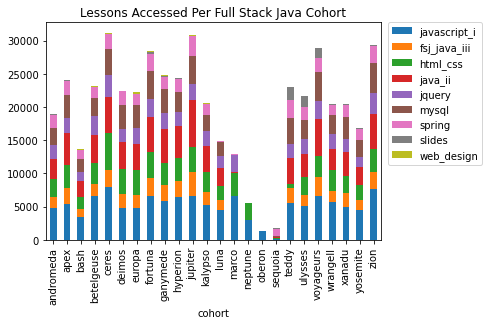

In [17]:
# Plots a barplot of number of entries for all Full Stack Java cohorts
q2_fsj_combined_lessons = pd.concat(q2_fsj_lesson_dfs_groupby, axis=1)
e.q2_fsj_bar(q2_fsj_combined_lessons)

##### The counts for top 2 cohorts for each set of lessons for Data Science

In [18]:
# list of names of ds series groupbys
q2_ds_lesson_dfs_groupby = [q2_ds_fundamentals_groupby, q2_ds_classification_groupby, q2_ds_sql_groupby,
                    q2_ds_regression_groupby, q2_ds_anomaly_detection_groupby, q2_ds_python_groupby,
                    q2_ds_stats_groupby, q2_ds_clustering_groupby, q2_ds_storytelling_groupby, 
                    q2_ds_timeseries_groupby, q2_ds_nlp_groupby, q2_ds_distributed_ml_groupby, 
                    q2_ds_advanced_topics_groupby]

<Figure size 1440x1152 with 0 Axes>

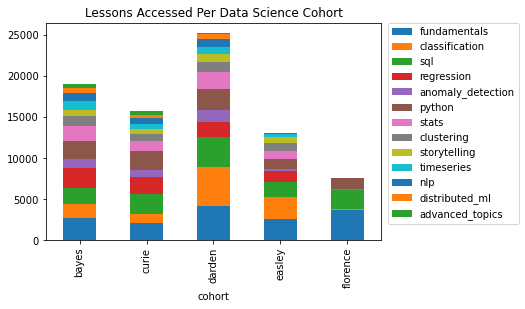

In [19]:
# Plots a barplot of number of entries for all Full Stack Java cohorts
q2_ds_combined_lessons = pd.concat(q2_ds_lesson_dfs_groupby, axis=1)
e.q2_ds_bar(q2_ds_combined_lessons)

##### The counts for top 2 cohorts for each set of lessons for Full Stack Java

##### Percentage of top set of lessons per Full Stack Javascript cohort over next highest

In [20]:
# percentage higher of the max value compared to the second highest
q2_ds_fundamentals_percentage = round(((q2_ds_fundamentals_groupby.sort_values(ascending=False)[0]/q2_ds_fundamentals_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_ds_classification_percentage = round(((q2_ds_classification_groupby.sort_values(ascending=False)[0]/q2_ds_classification_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_ds_sql_percentage = round(((q2_ds_sql_groupby.sort_values(ascending=False)[0]/q2_ds_sql_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_ds_regression_percentage = round(((q2_ds_regression_groupby.sort_values(ascending=False)[0]/q2_ds_regression_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_ds_anomaly_detection_percentage = round(((q2_ds_anomaly_detection_groupby.sort_values(ascending=False)[0]/q2_ds_anomaly_detection_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_ds_python_percentage = round(((q2_ds_python_groupby.sort_values(ascending=False)[0]/q2_ds_python_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_ds_stats_percentage = round(((q2_ds_stats_groupby.sort_values(ascending=False)[0]/q2_ds_stats_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_ds_clustering_percentage = round(((q2_ds_clustering_groupby.sort_values(ascending=False)[0]/q2_ds_clustering_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_ds_storytelling_percentage = round(((q2_ds_storytelling_groupby.sort_values(ascending=False)[0]/q2_ds_storytelling_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_ds_timeseries_percentage = round(((q2_ds_timeseries_groupby.sort_values(ascending=False)[0]/q2_ds_timeseries_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_ds_nlp_percentage = round(((q2_ds_nlp_groupby.sort_values(ascending=False)[0]/q2_ds_nlp_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_ds_distributed_ml_percentage = round(((q2_ds_distributed_ml_groupby.sort_values(ascending=False)[0]/q2_ds_distributed_ml_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_ds_advanced_topics_percentage = round(((q2_ds_advanced_topics_groupby.sort_values(ascending=False)[0]/q2_ds_advanced_topics_groupby.sort_values(ascending=False)[1])-1)*100, 2)


##### Percentage of top set of lessons per Full Stack Javascript cohort over next highest

In [21]:
# Percentage higher of the max value compared to the second highest
q2_fsj_javascript_i_percentage = round(((q2_fsj_javascript_i_groupby.sort_values(ascending=False)[0]/q2_fsj_javascript_i_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_fsj_java_iii_percentage = round(((q2_fsj_java_iii_groupby.sort_values(ascending=False)[0]/q2_fsj_java_iii_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_fsj_html_css_percentage = round(((q2_fsj_html_css_groupby.sort_values(ascending=False)[0]/q2_fsj_html_css_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_fsj_java_ii_percentage = round(((q2_fsj_java_ii_groupby.sort_values(ascending=False)[0]/q2_fsj_java_ii_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_fsj_jquery_percentage = round(((q2_fsj_jquery_groupby.sort_values(ascending=False)[0]/q2_fsj_jquery_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_fsj_mysql_percentage = round(((q2_fsj_mysql_groupby.sort_values(ascending=False)[0]/q2_fsj_mysql_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_fsj_spring_percentage = round(((q2_fsj_spring_groupby.sort_values(ascending=False)[0]/q2_fsj_spring_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_fsj_slides_percentage = round(((q2_fsj_slides_groupby.sort_values(ascending=False)[0]/q2_fsj_slides_groupby.sort_values(ascending=False)[1])-1)*100, 2)

q2_fsj_web_design_percentage = round(((q2_fsj_web_design_groupby.sort_values(ascending=False)[0]/q2_fsj_web_design_groupby.sort_values(ascending=False)[1])-1)*100, 2)


#### Key Takeaways

The Data Science cohorts with the highest lesson referrals compared to the next highest cohort are as follows:
- Darden
    - 73.60% for Classification
    - 55.56% for SQL
    - 36.70% for Anomaly Detection
- Bayes
    - 36.27% for Advanced Topics

The Full Stack Java cohorts with the highest lesson referrals compared to the next highest cohort are as follows:
- Ceres
    - 42.96% for HTML-CSS
- Jupiter
    - 26.5% for Java II

In [22]:
# Assigns a variable to a list of the differences in percentages between the top 2 cohorts for each lesson
q2_ds_lesson_percentages = [q2_ds_fundamentals_percentage, q2_ds_classification_percentage, 
                            q2_ds_sql_percentage, q2_ds_regression_percentage, q2_ds_anomaly_detection_percentage,
                            q2_ds_python_percentage, q2_ds_stats_percentage, q2_ds_clustering_percentage, 
                            q2_ds_storytelling_percentage, q2_ds_timeseries_percentage, q2_ds_nlp_percentage, 
                            q2_ds_distributed_ml_percentage, q2_ds_advanced_topics_percentage]

In [23]:
# Assigns a variable to a list of the differences in percentages between the top 2 cohorts for each lesson
q2_fsj_lesson_percentages = [q2_fsj_javascript_i_percentage, q2_fsj_java_iii_percentage, 
                             q2_fsj_html_css_percentage, q2_fsj_java_ii_percentage, q2_fsj_jquery_percentage,
                             q2_fsj_mysql_percentage, q2_fsj_spring_percentage, q2_fsj_slides_percentage, 
                             q2_fsj_web_design_percentage]

In [24]:
# Assigns a variable to a series converted from a list of the differences in 
# percentages between the top 2 cohorts for each lesson
ds_upper_bound_and_max = pd.Series(q2_ds_lesson_percentages)

fsj_upper_bound_and_max = pd.Series(q2_fsj_lesson_percentages)

# assigns a name to the series
ds_upper_bound_and_max.name = 'data_science_cohorts'

fsj_upper_bound_and_max.name = 'full_stack_java_cohorts'

In [25]:
# Gets the upper bound and difference from max of a series based on the InterQuartile Range
# and a multiplier. Default multiplier is 1.5
q2_ds_iqr = e.get_upper_bound_and_difference(ds_upper_bound_and_max)

q2_fsj_iqr = e.get_upper_bound_and_difference(fsj_upper_bound_and_max)

data_science_cohorts's Upper bound is 74.85, and difference from max is -1.25
full_stack_java_cohorts's Upper bound is 52.66, and difference from max is -9.7


#### Key Takeaways

- Using the Interquartile Range Rule the Darden Data Science cohort falls just within the upper bound of 74.85% compared to their 73.60%
- Using the Interquartile Range Rule the Ceres Full Stack Java cohort also falls within the upper bound of 52.66% compared to their 42.96%

### Second Interpretation
 - Using IQR on the whole set instead of top two cohorts

In [26]:
# Average of the sum of all values excluding the max
q2_ds_sql_under_max_avg = (q2_ds_sql_groupby.sum()-q2_ds_sql_groupby.max())/(len(q2_fsj_html_css_groupby)-1)

# Max value for a cohort for these lessons
q2_ds_sql_max = q2_ds_sql_groupby.max()

# Returns percentage difference of the max value compared to the average of the rest
q2_ds_sql_percentage_difference = round((q2_ds_sql_max/q2_ds_sql_under_max_avg*100), 2)

#### Key Takeaways

It shows the following Data Science lesson was referred to above the 1.5 IQR Upper Bound:
- SQL at 701.5 above the Upper bound with a 996.28% difference compared to average of rest of cohorts.
- While at 55.56% this Darden cohort may have been lower percentage-wise then its next immediate cohort, Curie, it's a more significant difference in comparison to all other cohorts referring to their respective lessons

It shows the following Full Stack Java lessons were referred to above the 1.5 IQR Upper Bound:
- HTML-CSS for Ceres, at 523.38, a 207.34% difference compared to average of rest of cohorts.
- JQuery for Ceres, at 64.75, a 170.93% difference compared to average of rest of cohorts.
- Slides for Teddy, at 1511.62, a 871.26% difference compared to average of rest of cohorts.
- While at 42.96% the Ceres cohort may have been under the 1.5 IQR percentage-wise when comparing the next highest cohort to the top cohort for each lesson, the Teddy cohort comes out on top when comparing the average of the rest of the cohorts when referring to the "Slides" lessons.

Final percentage difference for the max vs the average of the rest for the "HTML-CSS" lessons

In [27]:
# Average of the sum of all values excluding the max
q2_fsj_html_css_under_max_avg = (q2_fsj_html_css_groupby.sum()-q2_fsj_html_css_groupby.max())/(len(q2_fsj_html_css_groupby)-1)

# Max value for a cohort for these lessons
q2_fsj_html_css_max = q2_fsj_html_css_groupby.max()

# Returns percentage difference of the max value compared to the average of the rest
q2_fsj_html_css_percentage_difference = round((q2_fsj_html_css_max/q2_fsj_html_css_under_max_avg*100), 2)

Final percentage difference for the max vs the average of the rest for the "JQuery" lessons

In [28]:
# Average of the sum of all values excluding the max
q2_fsj_jquery_under_max_avg = (q2_fsj_jquery_groupby.sum()-q2_fsj_jquery_groupby.max())/(len(q2_fsj_jquery_groupby)-1)

# max value for a cohort for these lessons
q2_fsj_jquery_max = q2_fsj_jquery_groupby.max()

# Returns percentage difference of the max value compared to the average of the rest
q2_fsj_jquery_difference = round((q2_fsj_jquery_max/q2_fsj_jquery_under_max_avg*100), 2)

Final percentage difference for the max vs the average of the rest for the "Slides" lessons

In [29]:
# Average of the sum of all values excluding the max
q2_fsj_slides_under_max_avg = (q2_fsj_slides_groupby.sum()-q2_fsj_slides_groupby.max())/(len(q2_fsj_slides_groupby)-1)

# Max value for a cohort for these lessons
q2_fsj_slides_max = q2_fsj_slides_groupby.max()

# Returns percentage difference of the max value compared to the average of the rest
q2_fsj_slides_difference = round((q2_fsj_slides_max/q2_fsj_slides_under_max_avg*100), 2)

# Q2. Summary of Takeaways
- Question 2. *"Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?"*
- If applying the Interquartile Range (IQR) Rule to the difference in the percentages between the top cohort and it's runner-up for each set of lessons, none of them fall above the upper bound of the IQR.
- However when using the IQR to for the top cohort in comparison to the rest of the cohorts as a whole then for the **Teddy** cohort from the **Full Stack Java** program beats out the rest with the **"Slides"** lessons, and the **Darden** cohort from the **Data Science** program beats out the rest with the **"SQL"** lessons.


Quick take
- Q2 The Teddy and Darden cohorts referred significantly more to the "Slides" and "SQL" lessons respectively than the average of their respective program cohorts